In [1]:
import numpy as np
import numpy.random as npr
import math
from scipy import special
import torch
from tqdm import tqdm_notebook as tqdm

from scipy import linalg
from matplotlib import pyplot as plt

In [3]:
def target_fun(x):
    return np.sin(x*10)

def gen_data(n,d, domain):
    X = np.random.uniform(domain[0], domain[1], size = n)
    t = target_fun(X) + np.random.normal(size=X.shape)*0.1
    return X, t

def poly_expand(X, d=20, poly_type = 'legendre'):
  if poly_type == 'legendre':
    return np.polynomial.legendre.legvander(X, d)
  else:
    return np.polynomial.chebyshev.chebvander(X, d)

def plot_prediction(X, W, d, domain, plot=True):
  X_expand = poly_expand(X, d=d, poly_type = poly_type)
  p_train = X_expand.dot(W)
  loss = (((t - p_train)**2)*0.5).mean()

  X_val_raw = np.linspace(domain[0], domain[1], 1000)
  X_val_expand = poly_expand(X_val_raw, d=d, poly_type = poly_type)
  p_val = X_val_expand.dot(W)
  t_val = target_fun(X_val_raw)
  loss_val = (((t_val - p_val)**2)*0.5).mean()

  if plot:
    plt.plot(X_val_raw, p_val, label='deg {}'.format(d))
    plt.plot(X, t, 'o')
    plt.plot(X, p_train, '*')
    plt.ylim(-2, 2)
    plt.xlim(domain[0], domain[1])
  return loss_val

def plot_target_func():
  x = np.linspace(0, 1, 1000)
  plt.plot(x, target_fun(x), '--', label="target func")

def plot_val_loss(poly_degrees, losses):
  plt.figure()
  plt.plot(poly_degrees, losses)
  plt.semilogy()
  plt.semilogx()
  plt.ylim(0., 100)
  plt.ylabel('test loss')
  plt.xlabel('poly degrees')

In [13]:
def fit_poly(X, d,t):
  X_expand = poly_expand(X, d=d, poly_type = poly_type)
  n = X.shape[0]
  if d > n:
    ## Solution for Part 1.3.2: overparameterized case
    W = X_expand.T @ linalg.inv(X_expand @ X_expand.T) @ t
  else:
    ## Solution for Part 1.2.1: underparameterized case
    W = linalg.inv(X_expand.T @ X_expand) @ X_expand.T @ t
  return W

(0.0, 1.0)

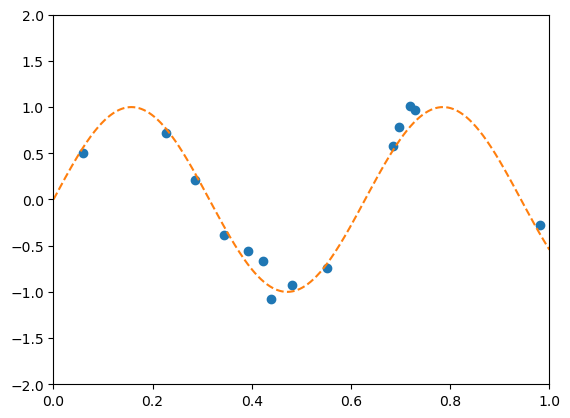

In [5]:
domain = [0., 1.]
n = 14
np.random.seed(123)
X, t = gen_data(n, 1, domain)

plt.plot(X, t, 'o')
plot_target_func()
plt.ylim(-2, 2)
plt.xlim(domain[0], domain[1])

C:\Users\Ethan's PC\AppData\Local\Temp\ipykernel_7392\1480984643.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0., 100)


[0.1938641170508137, 0.19343274883569167, 0.10255222991253363, 0.10915309156544765, 0.1773577943714454, 18.68118693228796, 8335161.60205302, 15679345066.210135, 317604.5746373222, 0.7120003515524961, 0.13281043237871082, 0.1599430277105052, 0.18800282052817616, 0.19468029146824442]


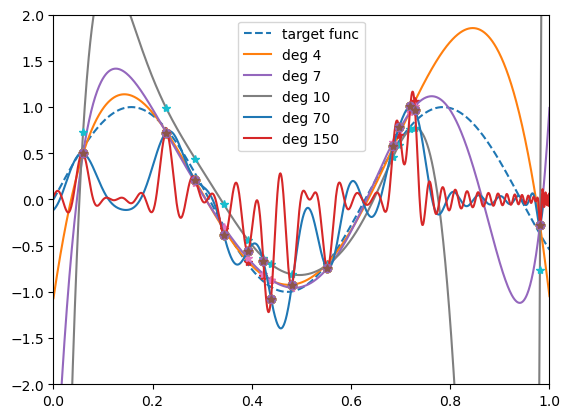

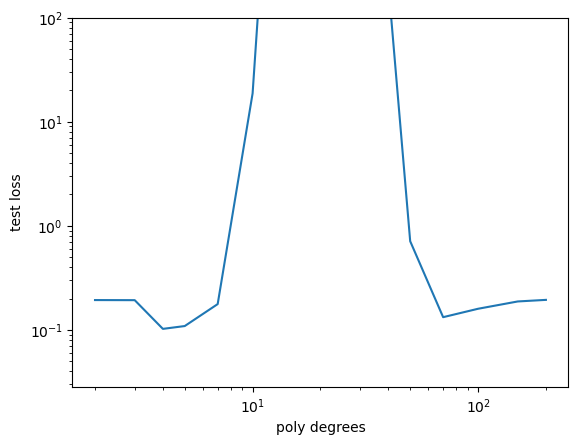

In [15]:
poly_type = 'chebyshev' # try legendre or chebyshev
loss_val_list = []

poly_degrees = [2, 3, 4, 5, 7, 10, 15, 20,30,50,70,100,150,200]
plot_poly_degress = [4, 7, 10, 70, 150] ## only plot these polynomials
##
plot_target_func()

for d in poly_degrees:
  W = fit_poly(X, d,t)
  plot_flag = True if d in plot_poly_degress else False
  loss_val = plot_prediction(X, W, d, domain, plot_flag)
  loss_val_list.append(loss_val)
plt.legend()

plot_val_loss(poly_degrees, loss_val_list)
print(loss_val_list)

The best dimension size (polynomial degree) is d=4, where the loss was 0.10255222991253363. Since n = 14, the underparameterized case works better for fitting to the target sine function.
The overparameterized cases lead to overfitting as they fit more exactly to the data points, but the loss graph shows that from d=50 onwards, the regression fit is so exact to the data points that the
error steadies back down to within a reasonable range. The loss grows exponentially at d=15, when the problem becomes overparameterized, resulting in the parabolic loss behaviour shown above. However, the overparameterized cases in general do not model the behaviour of the target function well, even though the loss comes back down to a lower value from d=50 onwards. Thus, the underparameterized cases work better for fitting the function in terms of generalizability to the overall behaviour of the function, and in terms of achieving the minimal loss.